<a href="https://colab.research.google.com/github/srimanrishi/Outlier-Detection-and-Handling-in-Datasets-using-Python/blob/main/outlier_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
df = pd.read_csv('/content/preprocessing_dataset.csv')

In [8]:
import pandas as pd
import numpy as np

# Create dummy data for demonstration
data = {
    'Age': [25, 30, np.nan, 35, 40, 22, 28, 60, 29, 31, 15, 50, 30, 27, 45],
    'Salary': [50000, 60000, 75000, np.nan, 80000, 45000, 55000, 150000, 62000, 68000, 30000, 90000, 70000, 52000, 85000],
    'Country': ['USA', 'Canada', 'USA', 'Germany', 'France', 'USA', 'UK', 'USA', 'Germany', 'Canada', 'France', 'UK', 'USA', 'Canada', 'Germany'],
    'Purchased': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}
df_dummy = pd.DataFrame(data)

# Save the dummy DataFrame to a CSV file
df_dummy.to_csv('/content/preprocessing_dataset.csv', index=False)
print("Dummy dataset 'preprocessing_dataset.csv' created successfully.")

Dummy dataset 'preprocessing_dataset.csv' created successfully.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        14 non-null     float64
 1   Salary     14 non-null     float64
 2   Country    15 non-null     object 
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 612.0+ bytes


In [10]:
df.describe()

,Age,Salary
count,14.000000,14.000000
mean,33.357143,69428.571429
std,11.836106,28402.909617
min,15.000000,30000.000000
25%,27.250000,52750.000000
50%,30.000000,65000.000000
75%,38.750000,78750.000000
max,60.000000,150000.000000


In [11]:
df.isnull().sum()

,0
Age,1
Salary,1
Country,0
Purchased,0


In [12]:
!pip install missingno

<Axes: >

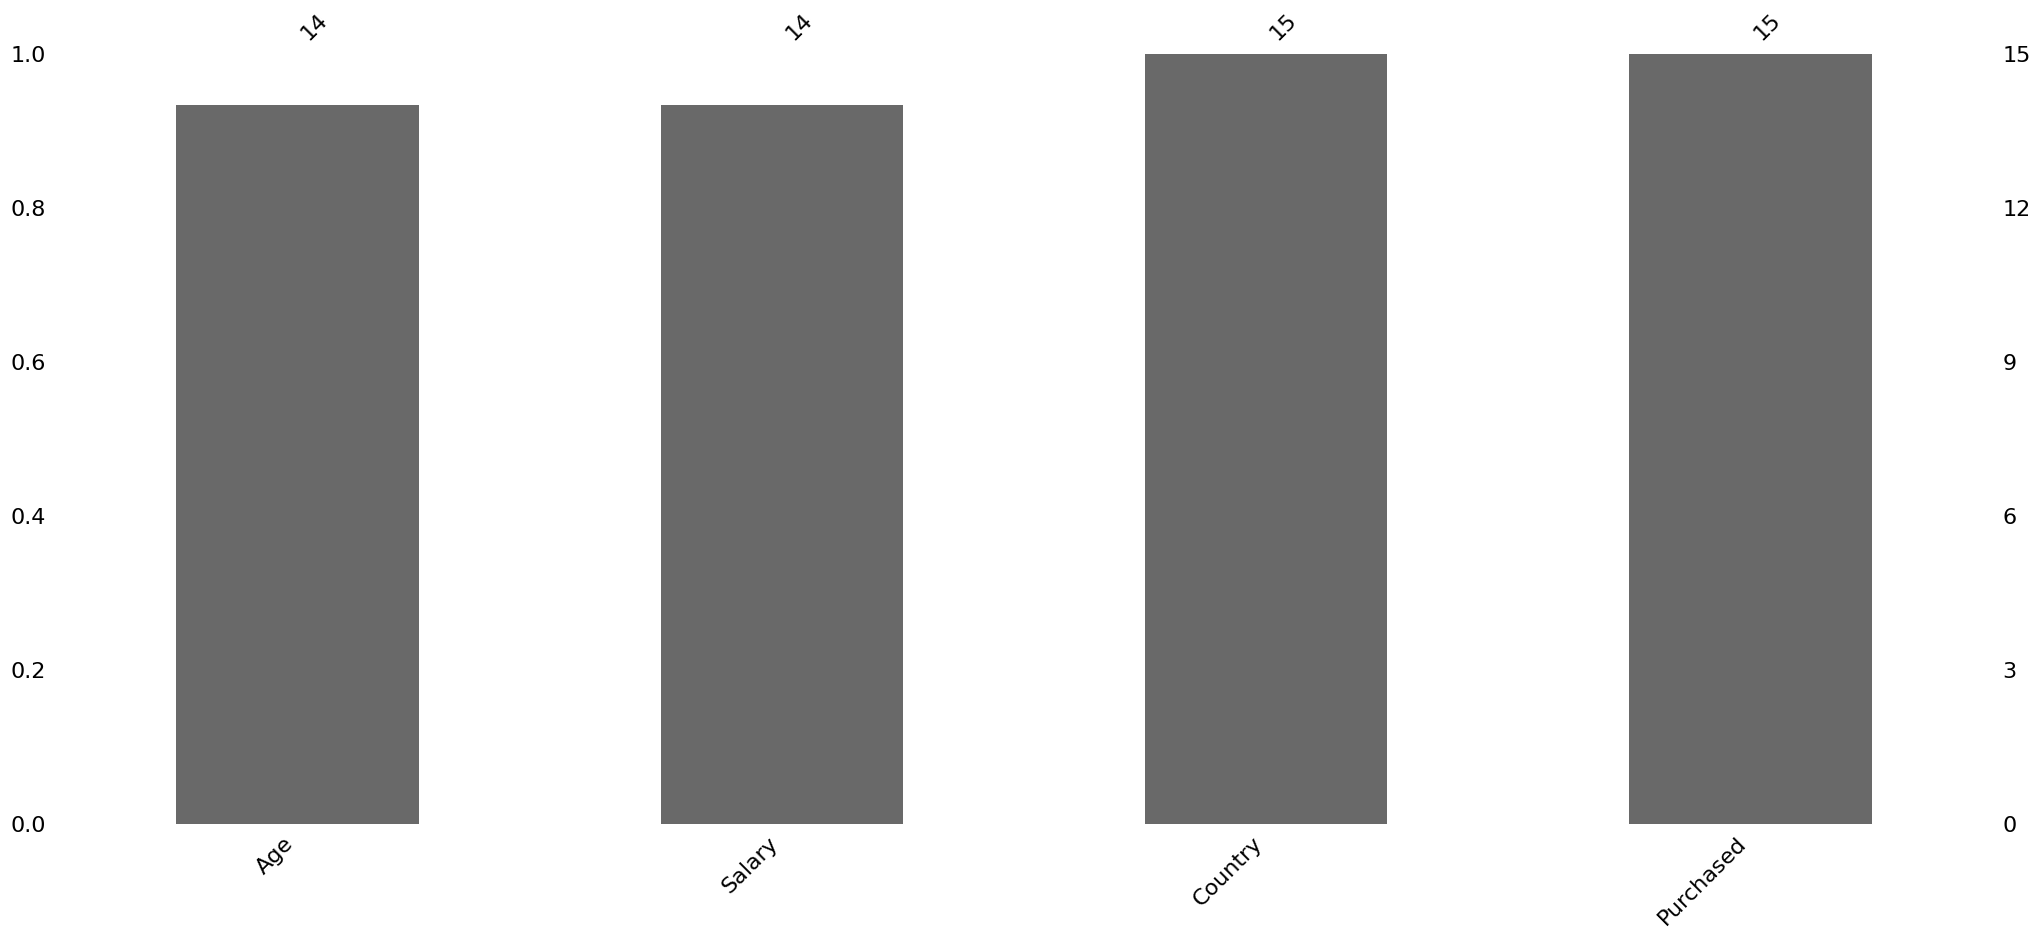

In [13]:
import missingno as msno
msno.bar(df)

<Axes: >

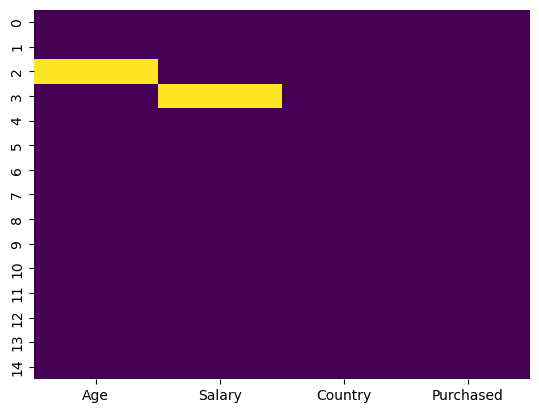

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

/tmp/ipython-input-1192239562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['Age']] = imputer.fit_transform(df[['Age']])
df

,Age,Salary,Country,Purchased
0,25.000000,50000.000000,USA,No
1,30.000000,60000.000000,Canada,Yes
2,33.357143,75000.000000,USA,No
3,35.000000,69428.571429,Germany,No
4,40.000000,80000.000000,France,Yes
5,22.000000,45000.000000,USA,No
6,28.000000,55000.000000,UK,Yes
7,60.000000,150000.000000,USA,No
8,29.000000,62000.000000,Germany,Yes
9,31.000000,68000.000000,Canada,No


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])
df_transformed = preprocessor.fit_transform(df)
df1 = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())
df1

,num__Age,num__Salary,cat__Country_Canada,cat__Country_France,cat__Country_Germany,cat__Country_UK,cat__Country_USA,cat__Purchased_No,cat__Purchased_Yes
0,-7.584430e-01,-7.347710e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-3.046737e-01,-3.565800e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-6.448450e-16,2.107064e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.490956e-01,5.503403e-16,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,6.028649e-01,3.998019e-01,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,-1.030705e+00,-9.238664e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,-4.861814e-01,-5.456755e-01,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2.417942e+00,3.047138e+00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,-3.954275e-01,-2.809418e-01,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-2.139198e-01,-5.402728e-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0


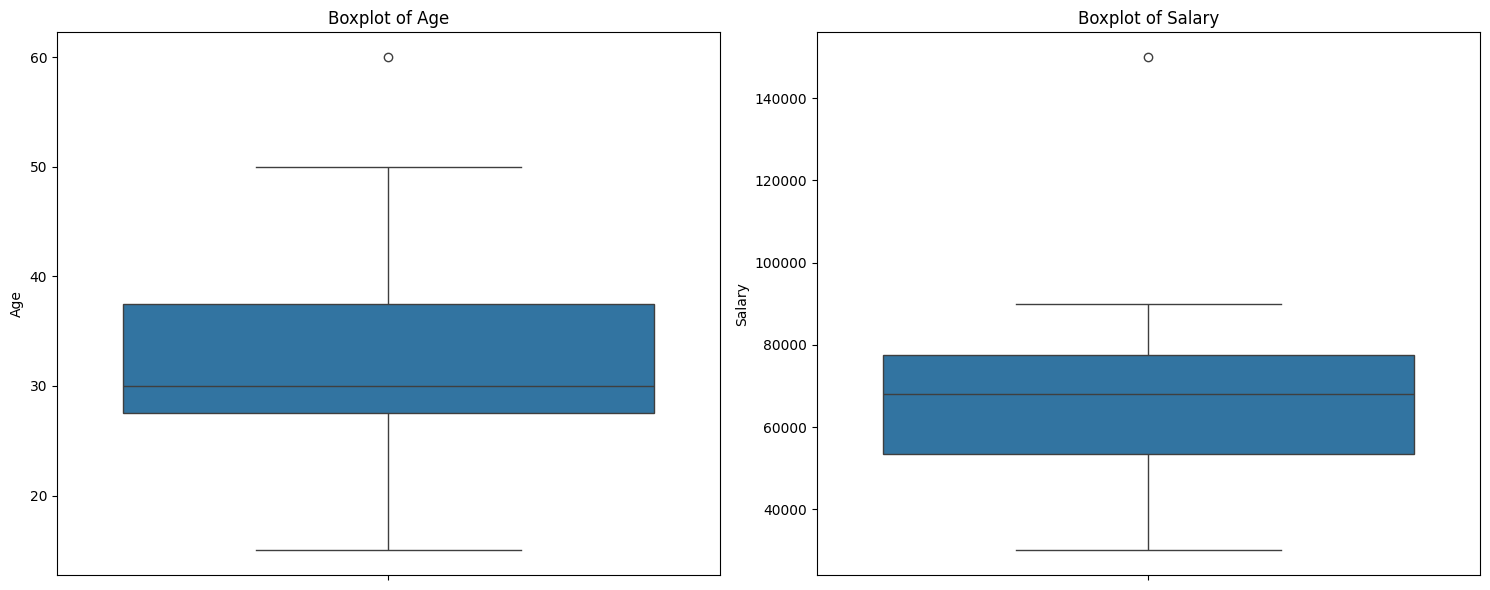

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [20]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

,Age,Salary,Country,Purchased
7,60.0,150000.0,USA,No


In [21]:
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=np.number))
df[np.abs(z_scores) > 2.5]

,Age,Salary,Country,Purchased
7,60.0,150000.0,USA,No


In [22]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
df['outlier'] = iso.fit_predict(df[['Age','Salary']])
df[df['outlier'] == -1]

,Age,Salary,Country,Purchased,outlier
7,60.0,150000.0,USA,No,-1
10,15.0,30000.0,France,No,-1


In [23]:
outlier_indices = outliers.index
df1_cleaned = df1.drop(index=outlier_indices)
df1_cleaned

,num__Age,num__Salary,cat__Country_Canada,cat__Country_France,cat__Country_Germany,cat__Country_UK,cat__Country_USA,cat__Purchased_No,cat__Purchased_Yes
0,-7.584430e-01,-7.347710e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-3.046737e-01,-3.565800e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-6.448450e-16,2.107064e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.490956e-01,5.503403e-16,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,6.028649e-01,3.998019e-01,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,-1.030705e+00,-9.238664e-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,-4.861814e-01,-5.456755e-01,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-3.954275e-01,-2.809418e-01,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-2.139198e-01,-5.402728e-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,-1.665982e+00,-1.491153e+00,0.0,1.0,0.0,0.0,0.0,1.0,0.0
